### Clean and conventional Energies in Mexico


#### In this project we'll examine how has been the implementation of clean energy from 2002 to 2017

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
sb.set()

### Load the data

In [2]:
data_capacity_2017 = pd.read_csv("Generación bruta de energía por tecnología(2002-2017) GigaWattsh.csv").iloc[:,0:16] # the units are MegaWatts

### Energy generation by technology (2002-2017) and its behaviour

In [3]:
data_capacity_2017.head(20)

,Unnamed: 0,I/2002,I/2003,I/2004,I/2005,I/2006,I/2007,I/2008,I/2009,I/2010,I/2011,I/2012,I/2013,I/2014,I/2015,I/2016
0,Total,200362.388300,202595.550700,207018.877600,217158.77810,223563.51150,230926.63890,234096.29250,233471.63770,241490.894800,257883.545500,260497.832100,257860.107000,258255.774300,261066.828100,263152.828000
1,Termoelectrica,130318.452400,135513.969800,140367.069000,138783.56760,143855.83660,154335.72770,153417.45890,160351.86610,160025.505800,171580.247800,178890.728900,179091.285500,168731.530400,177148.877900,180732.357100
2,Vapor,79299.769530,73743.001040,66334.091110,65077.25810,51930.95101,49482.42628,43325.39500,43111.72076,40569.621980,47868.928080,53917.755540,47166.776830,33480.816910,35673.222370,36833.999930
3,Ciclo combinado,44068.674350,54081.630450,70651.712790,71568.50085,89547.89797,101048.57870,106055.78780,112264.45830,114817.553000,118454.541500,117606.004200,126583.375700,130907.363000,134486.621600,136123.691200
4,CFE,22216.644760,22437.122280,24796.920370,26010.93095,30120.06029,30066.90320,31823.74501,35768.15165,36375.560550,34448.790260,37431.016670,43114.952790,47057.365850,47513.325340,49962.822270
5,PIE (1),21852.029600,31644.508170,45854.792420,45557.56990,59427.83768,70981.67554,74232.04280,76496.30666,78441.992460,84005.751260,80174.987500,83468.422920,83849.997160,86973.296310,86160.868980
6,Turbogas,6394.526855,6934.433078,2771.506390,1358.17320,1523.12028,2665.78004,2802.43320,3735.15764,3396.011616,4125.470122,6216.616472,3842.145038,2877.626467,5281.092040,5893.068009
7,Combustion interna,555.481676,754.905258,609.758759,779.63548,853.86731,1138.94266,1233.84286,1240.52942,1242.319209,1131.308096,1150.352680,1498.987892,1465.723996,1707.941830,1881.597953
8,Dual,13879.465320,13858.650100,7915.279818,14275.11421,13875.19158,13375.02708,6883.31096,12298.60595,15577.758080,15395.878870,16233.964030,15583.717610,16166.989740,3475.166681,0.000000
9,Carboelectrica,16151.910850,16681.198880,17883.260210,18380.28163,17931.20339,18100.72047,17789.14047,16886.20967,16485.075950,18158.430520,17724.103150,16044.400000,17445.926680,30124.020550,34208.204570


#### Growth by technology

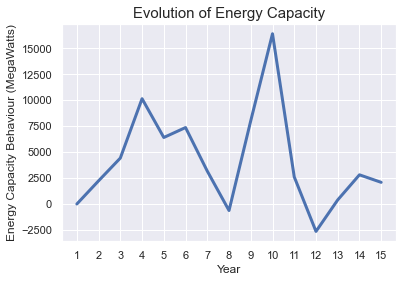

In [4]:
def energyBehaviour(energyCapacities):
    energyCapacities.pop(0)
    growthByYear = {}
    difference = energyCapacities[0]
    year = 0
    for energyCapacity in energyCapacities:
        try:
            energyCapacity = float(energyCapacity)
            currentDifference = energyCapacity - difference
            year += 1
            growthByYear[str(year)] = round(currentDifference,2)
            difference = energyCapacity
        except:
            print("An error occurred while parsing")
    x = []
    y = []
    for year,difference in growthByYear.items():
        x.append(year)
        y.append(difference)
    return [x,y]
        

energyCapacityBehaviour = energyBehaviour(list(data_capacity_2017.loc[0]))
plt.plot(energyCapacityBehaviour[0],energyCapacityBehaviour[1], lw=3)
plt.xlabel("Year")
plt.ylabel("Energy Capacity Behaviour (MegaWatts)")
plt.title("Evolution of Energy Capacity", fontsize=15)
plt.show()

##### Thermoelectric energy behaviour

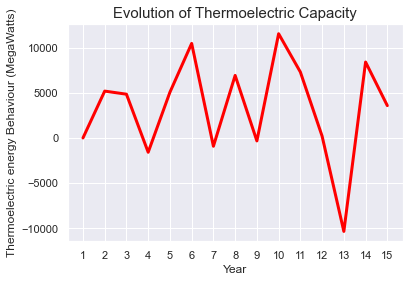

In [5]:
thermoelectricEnergy = energyBehaviour(list(data_capacity_2017.loc[1]))
plt.plot(thermoelectricEnergy[0],thermoelectricEnergy[1], lw=3, color="red")
plt.xlabel("Year")
plt.ylabel("Thermoelectric energy Behaviour (MegaWatts)")
plt.title("Evolution of Thermoelectric Capacity", fontsize=15)
plt.show()

##### Combined cycle energy behaviour

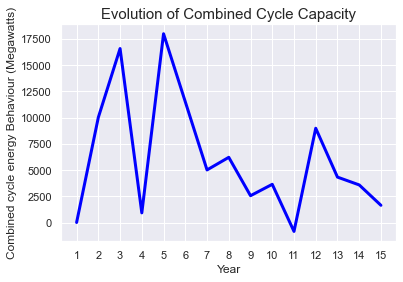

In [6]:
combinedCycleEnergy = energyBehaviour(list(data_capacity_2017.loc[3]))
plt.plot(combinedCycleEnergy[0],combinedCycleEnergy[1], lw=3, color= "blue")
plt.xlabel("Year")
plt.ylabel("Combined cycle energy Behaviour (Megawatts)")
plt.title("Evolution of Combined Cycle Capacity", fontsize=15)
plt.show()

##### Carbo electric energy behaviour

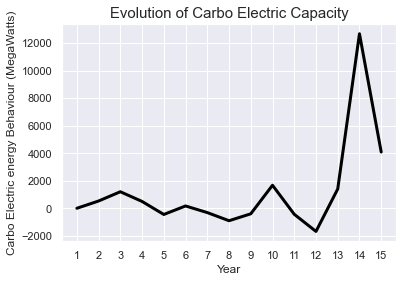

In [7]:
carboElectricBehaviour= energyBehaviour(list(data_capacity_2017.loc[9]))
plt.plot(carboElectricBehaviour[0],carboElectricBehaviour[1], lw=3, color= "black")
plt.xlabel("Year")
plt.ylabel("Carbo Electric energy Behaviour (MegaWatts)")
plt.title("Evolution of Carbo Electric Capacity", fontsize=15)
plt.show()

#### Clean energy behaviour

##### Wind power behaviour

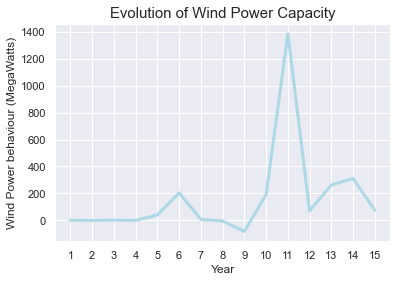

In [8]:
windEnergyBehaviour= energyBehaviour(list(data_capacity_2017.loc[12]))
plt.plot(windEnergyBehaviour[0],windEnergyBehaviour[1], lw=3, color= "lightblue")
plt.xlabel("Year")
plt.ylabel("Wind Power behaviour (MegaWatts)")
plt.title("Evolution of Wind Power Capacity", fontsize=15)
plt.show()

##### Geothermic energy behaviour

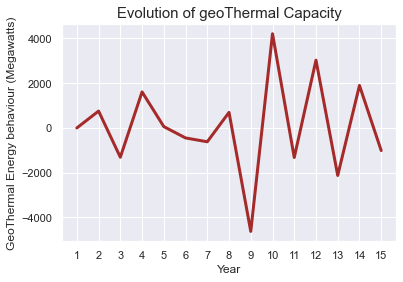

In [9]:
geoThermalEnergyBehaviour= energyBehaviour(list(data_capacity_2017.loc[11]))
plt.plot(geoThermalEnergyBehaviour[0],geoThermalEnergyBehaviour[1], lw=3, color= "brown")
plt.xlabel("Year")
plt.ylabel("GeoThermal Energy behaviour (Megawatts)")
plt.title("Evolution of geoThermal Capacity", fontsize=15)
plt.show()

##### Hydroelectric energy behaviour 

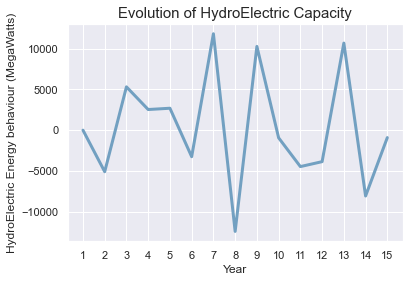

In [10]:
hydroElectricEnergyBehaviour= energyBehaviour(list(data_capacity_2017.loc[15]))
plt.plot(hydroElectricEnergyBehaviour[0],hydroElectricEnergyBehaviour[1], lw=3, color= "#72A0C1")
plt.xlabel("Year")
plt.ylabel("HydroElectric Energy behaviour (MegaWatts)")
plt.title("Evolution of HydroElectric Capacity", fontsize=15)
plt.show()

##### Photovoltaic energy behaviour

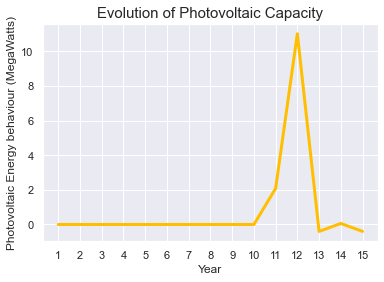

In [11]:
photoVoltaicEnergyBehaviour= energyBehaviour(list(data_capacity_2017.loc[16]))
plt.plot(photoVoltaicEnergyBehaviour[0],photoVoltaicEnergyBehaviour[1], lw=3, color= "#FFBF00")
plt.xlabel("Year")
plt.ylabel("Photovoltaic Energy behaviour (MegaWatts)")
plt.title("Evolution of Photovoltaic Capacity", fontsize=15)
plt.show()

##### Nuclear Power Behaviour

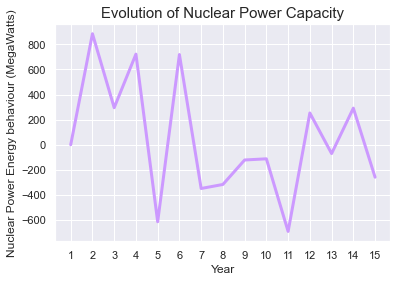

In [12]:
nuclearPowerEnergyBehaviour= energyBehaviour(list(data_capacity_2017.loc[10]))
plt.plot(nuclearPowerEnergyBehaviour[0],nuclearPowerEnergyBehaviour[1], lw=3, color= "#CC99FF")
plt.xlabel("Year")
plt.ylabel("Nuclear Power Energy behaviour (MegaWatts)")
plt.title("Evolution of Nuclear Power Capacity", fontsize=15)
plt.show()

Now, I'll group all the energy that comes from renewable sources and that it's clean for the environment.I'm not going to include the photovoltaic energy due to the lack of data. The types of energies I'll take into consideration are:
* Nuclear Power [ row 10]
* Geothermal [row 11]
* Wind Power [row 12]
* Hydroelectric [row 15]

In [13]:
nuclearPower = tuple(data_capacity_2017.loc[10])
geothermal = tuple(data_capacity_2017.loc[11])
windPower = tuple(data_capacity_2017.loc[12])
hydroelectric = tuple(data_capacity_2017.loc[15])
energies = [nuclearPower,geothermal,windPower,hydroelectric]
cleanEnergies = pd.DataFrame(energies, 
                             columns=["Technology","2002","2003","2004","2005", "2006", "2007","2008", "2009","2010","2011","2012", "2013", "2014", "2015","2016"])
cleanEnergies

,Technology,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Geotermolectrica,5397.615851,6281.658041,6576.804789,7298.51914,6685.38685,7403.85421,7055.75984,6739.66613,6618.460157,6506.614329,5816.642183,6069.717305,5999.650983,6291.15399,6032.801411
1,Nucleoelectrica,9746.621120,10501.507770,9193.935356,10804.90604,10866.24109,10420.72502,9803.97628,10501.07890,5879.240639,10089.195030,8769.598816,11799.869610,9677.208057,11577.13787,10567.174250
2,Eolica,6.666589,5.373959,6.146724,4.99936,44.80283,248.43238,254.61331,249.24681,166.391975,357.282677,1744.144413,1813.889620,2077.000412,2386.94645,2461.542146
3,Hidroelectrica,24861.656160,19753.192130,25076.381690,27611.39006,30304.84923,27042.15205,38892.03273,26444.96415,36738.462230,35795.896240,31316.574260,27444.133130,38144.773860,30050.76785,29138.395620


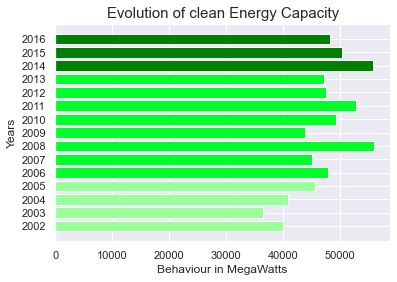

In [14]:
def totalCleanEnergy(years):
    cleanEnergies_year = {}
    for year in years:
        cleanEnergies_year[year] = list(cleanEnergies[year]) 
    for year,cleanEnergy in cleanEnergies_year.items():
        try:
            energyTotal = [float(energy) for energy in cleanEnergy]
            cleanEnergies_year[year] = sum(energyTotal)
        except:
            pass
    
    x = []
    y = []
    for year,totalEnergy in cleanEnergies_year.items():
        x.append(year)
        y.append(totalEnergy)
    return [x,y]     

totalCleanEnergyCapacity = totalCleanEnergy(["2002","2003","2004","2005", "2006", "2007","2008", "2009","2010","2011","2012", "2013", "2014", "2015","2016"])
plt.barh(totalCleanEnergyCapacity[0], totalCleanEnergyCapacity[1],color= ["#99FF99", "#99FF99", "#99FF99", "#99FF99", "#00FF2A", "#00FF2A", "#00FF2A", "#00FF2A", "#00FF2A", "#00FF2A", "#00FF2A", "#00FF2A", "green", "green", "green"])
plt.xlabel("Behaviour in MegaWatts")
plt.ylabel("Years")
plt.title("Evolution of clean Energy Capacity", fontsize=15)
plt.show()

In [15]:
increase = (totalCleanEnergyCapacity[1][14] -  totalCleanEnergyCapacity[1][0]) / totalCleanEnergyCapacity[1][0]
print("Clean Energy Tecnologies increased by " + str(round(increase * 100,2)) + "%")

Clean Energy Tecnologies increased by 20.46%
